In [1]:
#Task_3

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Convert 'TransactionDate' to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Step 1: Data Preparation
# Aggregate transaction data for each customer
transaction_agg = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Transaction frequency
    'TransactionDate': lambda x: (x.max() - x.min()).days  # Recency
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'TransactionCount',
    'TransactionDate': 'Recency'
}).reset_index()


In [5]:
# Merge with customer data
customer_data = customers.merge(transaction_agg, on='CustomerID', how='left')

In [6]:
# Fill missing values (if any)
customer_data.fillna(0, inplace=True)

In [7]:
# Step 2: Feature Engineering
# Select features for clustering
features = customer_data[['TotalSpending', 'TransactionCount', 'Recency']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Step 3: Clustering
# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

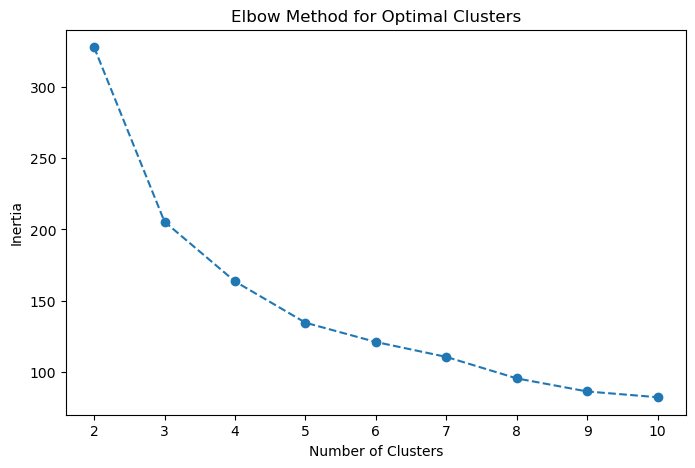

In [9]:
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
# Choosing the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [11]:
# Step 4: Evaluation
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.0672919896715578


In [12]:
# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, customer_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3211316465481015


In [13]:
# Step 5: Visualization
# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_data['PCA1'] = reduced_features[:, 0]
customer_data['PCA2'] = reduced_features[:, 1]

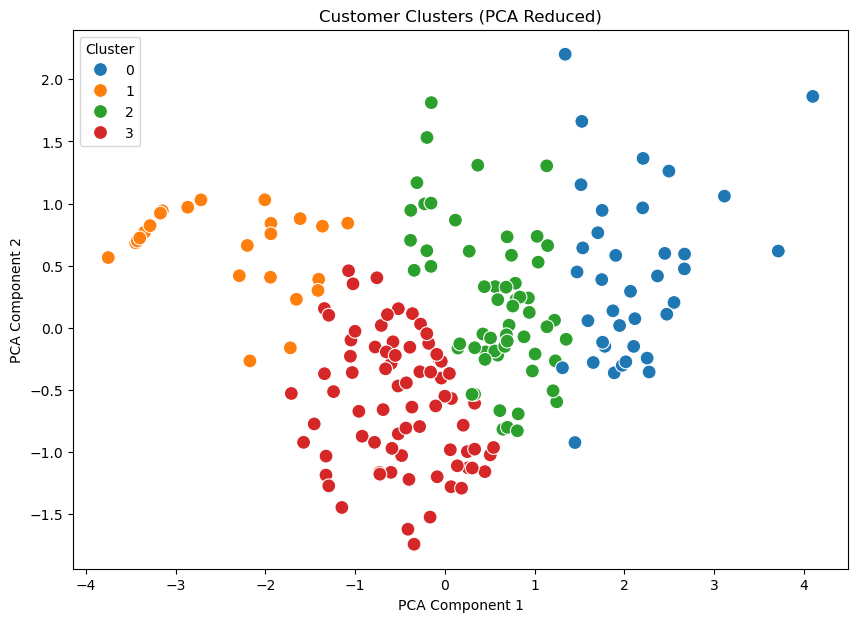

In [14]:
# Scatter plot of clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()